In [1]:
## Generally setup
import numpy as np
import os
import os.path as op
import matplotlib.pyplot as plt
from langouEEG import *
from scipy.stats import *
from eeg_microstates3 import *
import pandas as pd
import time
import mne
import pickle
from mne.datasets import sample
from mne.datasets import fetch_fsaverage
from mpl_toolkits.mplot3d import Axes3D  # noqa
from langouMicrostates import *
from IPython.display import clear_output as clear
import logging
# import easyEEG

sample_data_folder = mne.datasets.sample.data_path()
# dataRoot = "/data/home/viscent/Light"
dataRoot = "/work/zhangyq/Light/"


# Download fsaverage files
fs_dir = fetch_fsaverage(verbose=True)
isMale = False
isAll = True
isBlind = False
if not isAll:
    result_dir = op.join(dataRoot,'result','male' if isMale else 'female')
else:
    result_dir = op.join(dataRoot,'result','all')
if isBlind:
    result_dir = op.join(result_dir,'Blind')
subjects_dir = op.dirname(fs_dir)
if not op.exists(result_dir):
    os.mkdir(result_dir)
# The files live in:
subject = 'fsaverage'
trans = 'fsaverage'  # MNE has a built-in fsaverage transformation
src = op.join(fs_dir, 'bem', 'fsaverage-ico-5-src.fif')
bem = op.join(fs_dir, 'bem', 'fsaverage-5120-5120-5120-bem-sol.fif')
print(__doc__)

0 files missing from root.txt in /work/zhangyq/mne_data/MNE-fsaverage-data
0 files missing from bem.txt in /work/zhangyq/mne_data/MNE-fsaverage-data/fsaverage
Automatically created module for IPython interactive environment


In [2]:
%%capture
## Input EEG data and extarct epochs

epochs_4F = dict()
epochs_RF = dict()
epochs_4R = dict()
epochs_RR = dict()

tmin_rest, tmax_rest, tmin_flick,tmax_flick = 40, 60, 15, 30
tmin_R_flick, tmax_R_flick = 20, 25

for subject_name in range(1,21):
    
    if not isAll:
        if not (isMale ^ (subject_name in [7,8,11,17])):
            continue
    if subject_name<10:
        subject_name='S0'+str(subject_name)
    else:
        subject_name='S'+str(subject_name)
    with open(dataRoot+'/clean_data_av/'+subject_name+'_clean.lgeeg','rb') as f:
        raw=pickle.load(f)
    events, event_dict=extractEvents(raw)
    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')
    if isBlind:
        epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochsBlind(raw,events,picks, 
        tmin_rest = 60,tmax_rest = 87,tmin_flick = 3,tmax_flick = 30)
    else:
        epoch_RR,epoch_RF,epoch_4R,epoch_4F = extractEpochs_id(raw,events,picks, 
        tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_flick,tmax_flick = tmax_flick)
        _,epoch_RF,_,_ = extractEpochs_id(raw,events,picks, 
        tmin_rest = tmin_rest,tmax_rest = tmax_rest,tmin_flick = tmin_R_flick,tmax_flick = tmax_R_flick)
    epochs_4F[subject_name]=epoch_4F
    epochs_RF[subject_name]=epoch_RF
    epochs_RR[subject_name]=epoch_RR
    epochs_4R[subject_name]=epoch_4R
    if not op.exists(os.path.join(dataRoot,'fwd_solution.lgeeg')):
        fwd = mne.make_forward_solution(raw.info, trans=trans, src=src,
                                        bem=bem, eeg=True, mindist=5.0, n_jobs=1)
        print(fwd)
        mne.write_forward_solution(os.path.join(dataRoot,'fwd_solution.lgeeg'),fwd,overwrite=True)
    else:
        fwd = mne.read_forward_solution(os.path.join(dataRoot,'fwd_solution.lgeeg'))
    data_path = sample.data_path()

    picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False,
                        exclude='bads')
    # Clear output display
    clear()

## Concact epochs
epoch_4F = mne.concatenate_epochs(list(epochs_4F.values()))
epoch_RF = mne.concatenate_epochs(list(epochs_RF.values()))
epoch_4R = mne.concatenate_epochs(list(epochs_4R.values()))
# mne.epochs.equalize_epoch_counts([epoch_4F, epoch_RF, epoch_RR])

# Clear output display
clear()

In [3]:
result_dir = "/data/home/viscent/Light/result/microstates"
tm = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
time_augs=[['min_rest','max_rest','min_flick','max_flick','min_random_flick','max_random_flick']
,[tmin_rest, tmax_rest, tmin_flick, tmax_flick, tmin_R_flick, tmax_R_flick]]
to_save_cache = True

(1050105, 64)


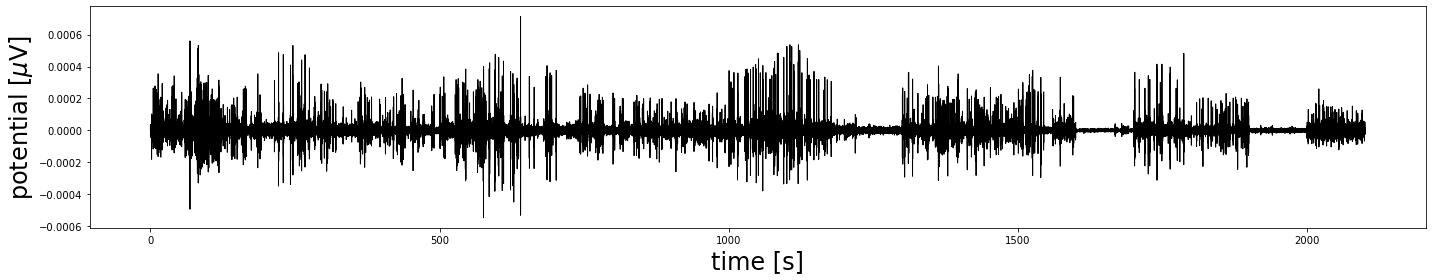

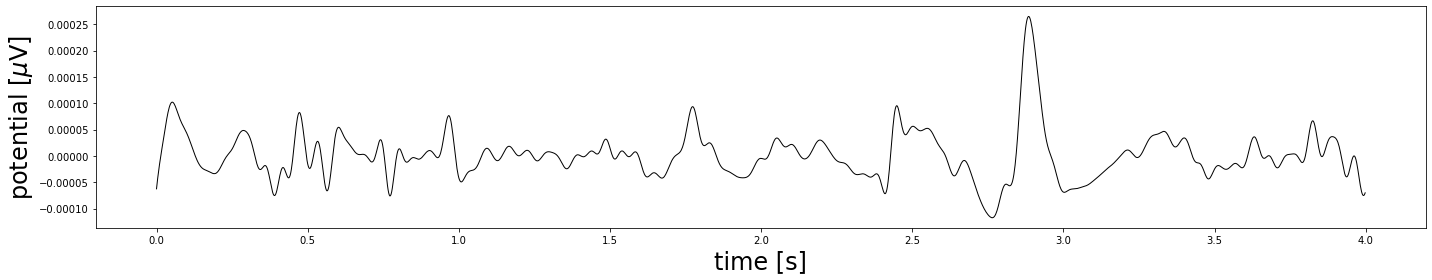

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 38501 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 36 iterations.
	K-means run 2/5 converged after 18 iterations.
	K-means run 3/5 converged after 46 iterations.
	K-means run 4/5 converged after 47 iterations.
	K-means run 5/5 converged after 30 iterations.
[+] Computation time: 9.45 sec

[+] Microstate back-fitting:
data_norm:  (1050105, 64)
data_cluster_norm:  (38501, 64)
maps:  (4, 64)

[+] Global explained variance GEV = 0.697
GEV_0: 0.524
GEV_1: 0.067
GEV_2: 0.047
GEV_3: 0.060

Empirical symbol distribution (RTT):

p_0 = 0.278
p_1 = 0.229
p_2 = 0.260
p_3 = 0.232

Empirical transition matrix:

|0.9410.0190.0210.019|
|0.0220.9030.0330.042|
|0.0230.0290.9170.031|
|0.0220.0410.0340.902|

GFP peaks per sec.: 18.33

Global explained variance (GEV) per map:
GEV(ms-0) = 0.52
GEV(ms-1) = 0.07
GEV(ms-2) = 0.05
GEV(ms-3) = 0.06

total GEV: 0.697

Empirical entropy H = 1.38 (ma

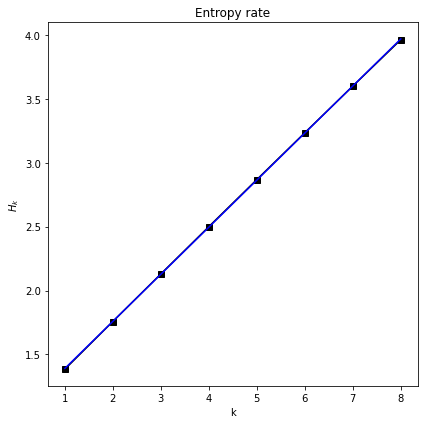


Empirical entropy rate h = 0.37
Theoretical MC entropy rate h = 0.37
The lzc:
(21,)
[2932, 3300, 3266, 3322, 3218, 3083, 3576, 3357, 3099, 3083, 3098, 3501, 3041, 3069, 3129, 3145, 3448, 3326, 3452, 3674, 2]


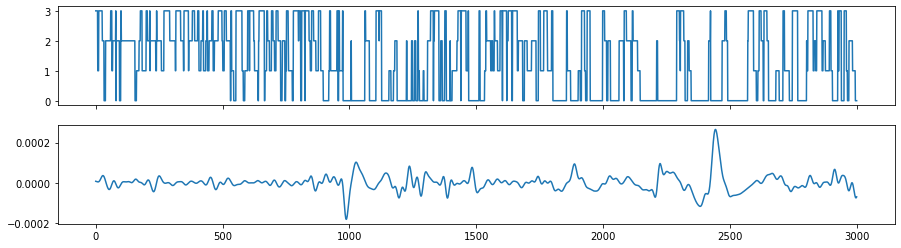

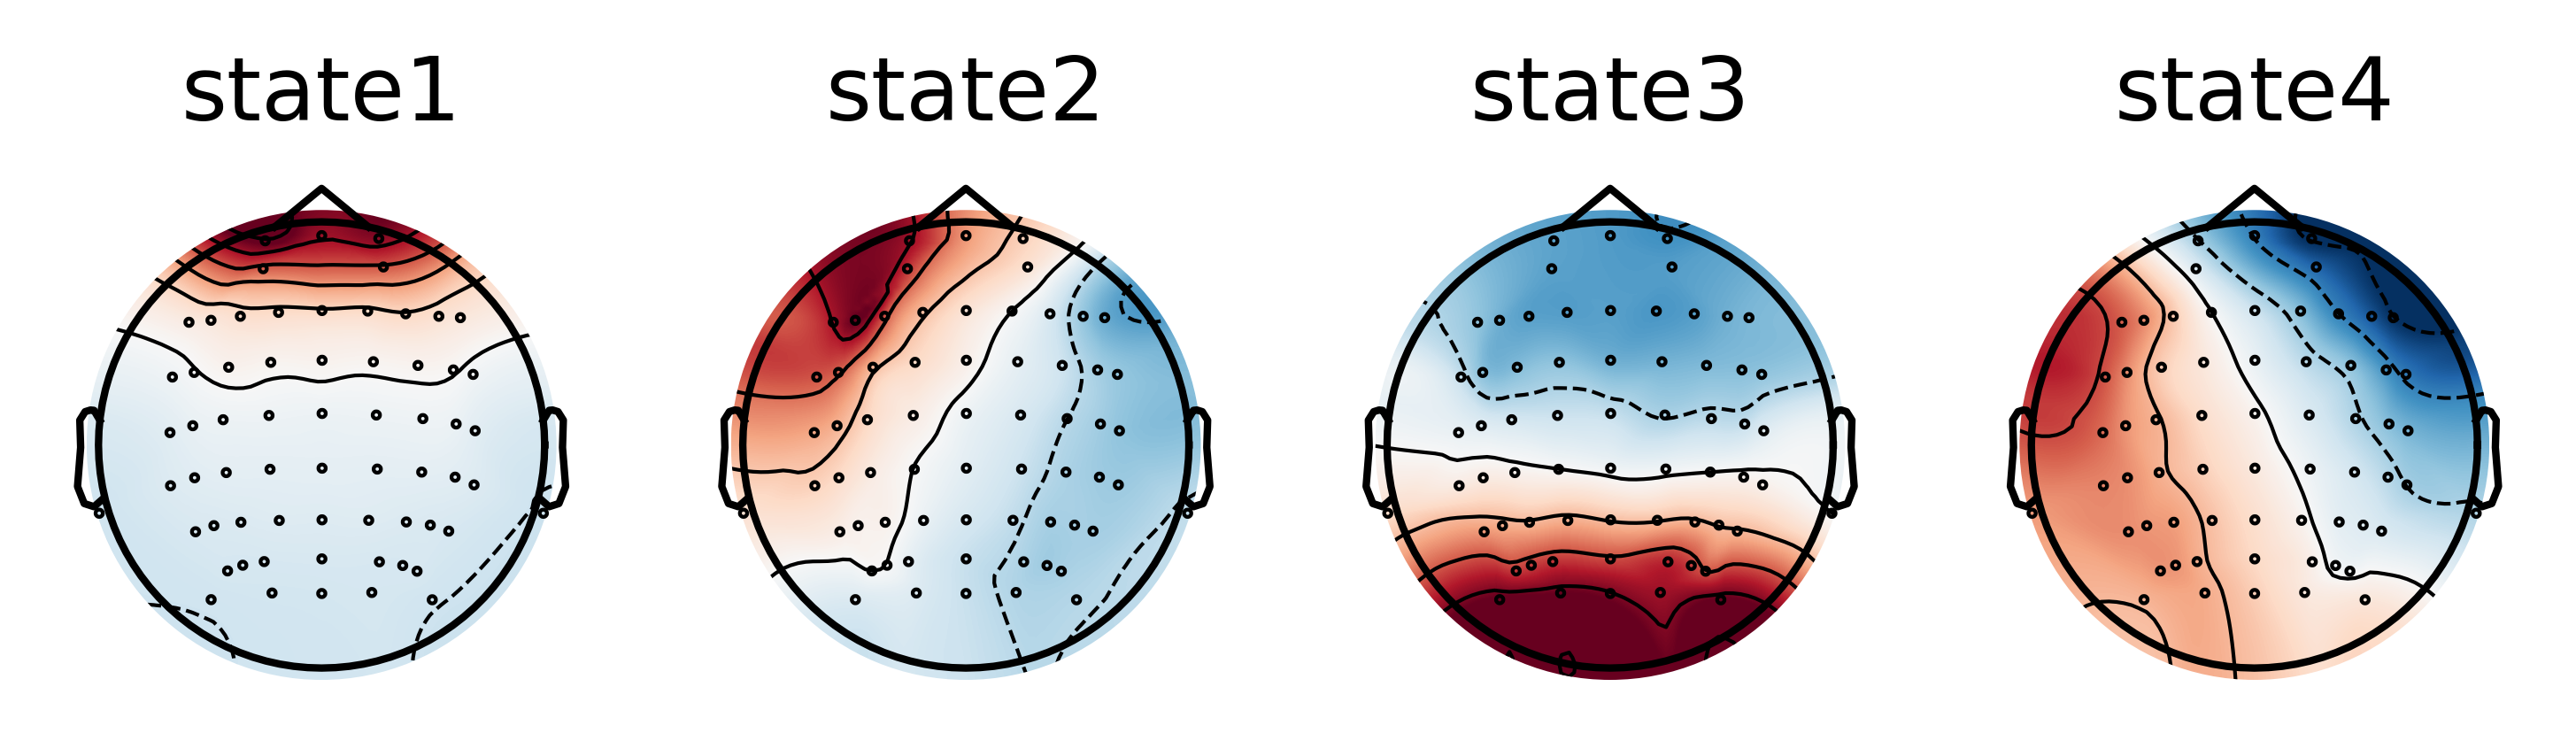

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

In [4]:
vars_4R = display_maps(epoch_4R, n_maps=4, save=True, dpi=600, filename='40Hz_rest',
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=True, epochs=epochs_4R,save_log=True)

(765102, 64)


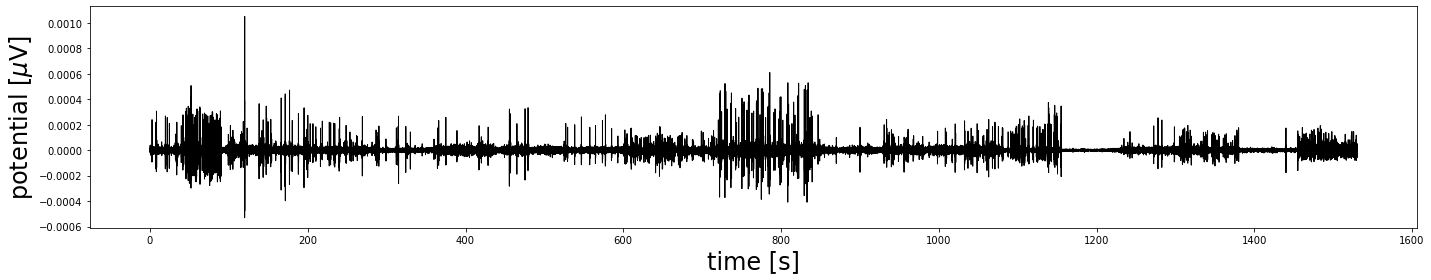

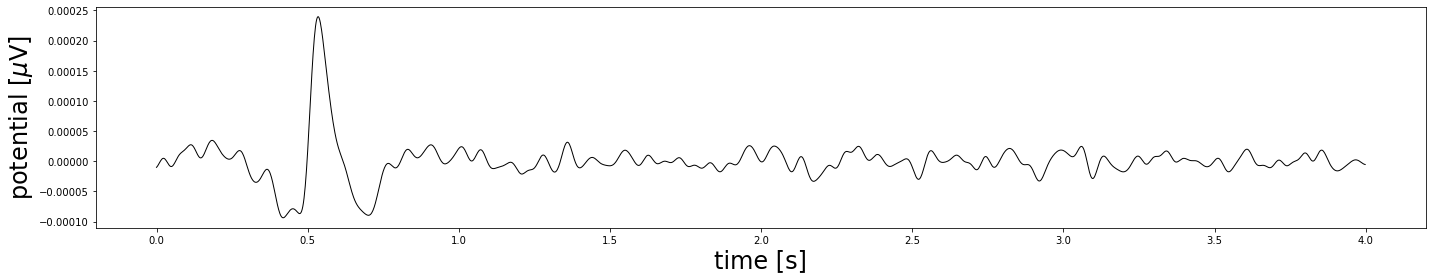

Clustering algorithm: kmeans
[+] Data format for clustering [GFP peaks, channels]: 29405 x 64

[+] Clustering algorithm: mod. K-MEANS.
	K-means run 1/5 converged after 44 iterations.
	K-means run 2/5 converged after 47 iterations.
	K-means run 3/5 converged after 25 iterations.
	K-means run 4/5 converged after 33 iterations.
	K-means run 5/5 converged after 115 iterations.
[+] Computation time: 9.61 sec

[+] Microstate back-fitting:
data_norm:  (765102, 64)
data_cluster_norm:  (29405, 64)
maps:  (4, 64)

[+] Global explained variance GEV = 0.738
GEV_0: 0.579
GEV_1: 0.043
GEV_2: 0.058
GEV_3: 0.058

Empirical symbol distribution (RTT):

p_0 = 0.237
p_1 = 0.279
p_2 = 0.202
p_3 = 0.282

Empirical transition matrix:

|0.9380.0230.0190.020|
|0.0170.9080.0340.041|
|0.0240.0450.8900.041|
|0.0180.0400.0290.913|

GFP peaks per sec.: 19.22

Global explained variance (GEV) per map:
GEV(ms-0) = 0.58
GEV(ms-1) = 0.04
GEV(ms-2) = 0.06
GEV(ms-3) = 0.06

total GEV: 0.738

Empirical entropy H = 1.38 (ma

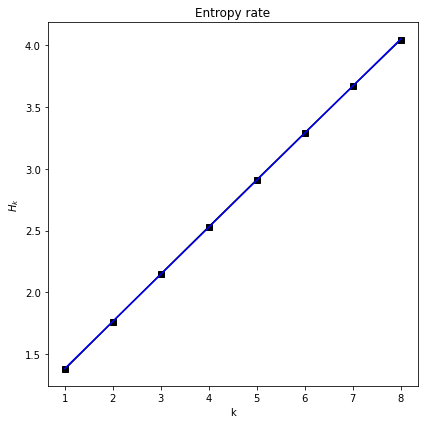


Empirical entropy rate h = 0.38
Theoretical MC entropy rate h = 0.39
The lzc:
(21,)
[2270, 2482, 2680, 2627, 2733, 2808, 2794, 2681, 2332, 2370, 2379, 2661, 2447, 2640, 2245, 2302, 2730, 2472, 2625, 2691, 1]


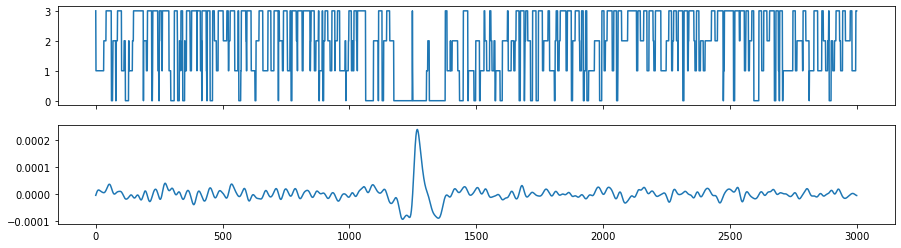

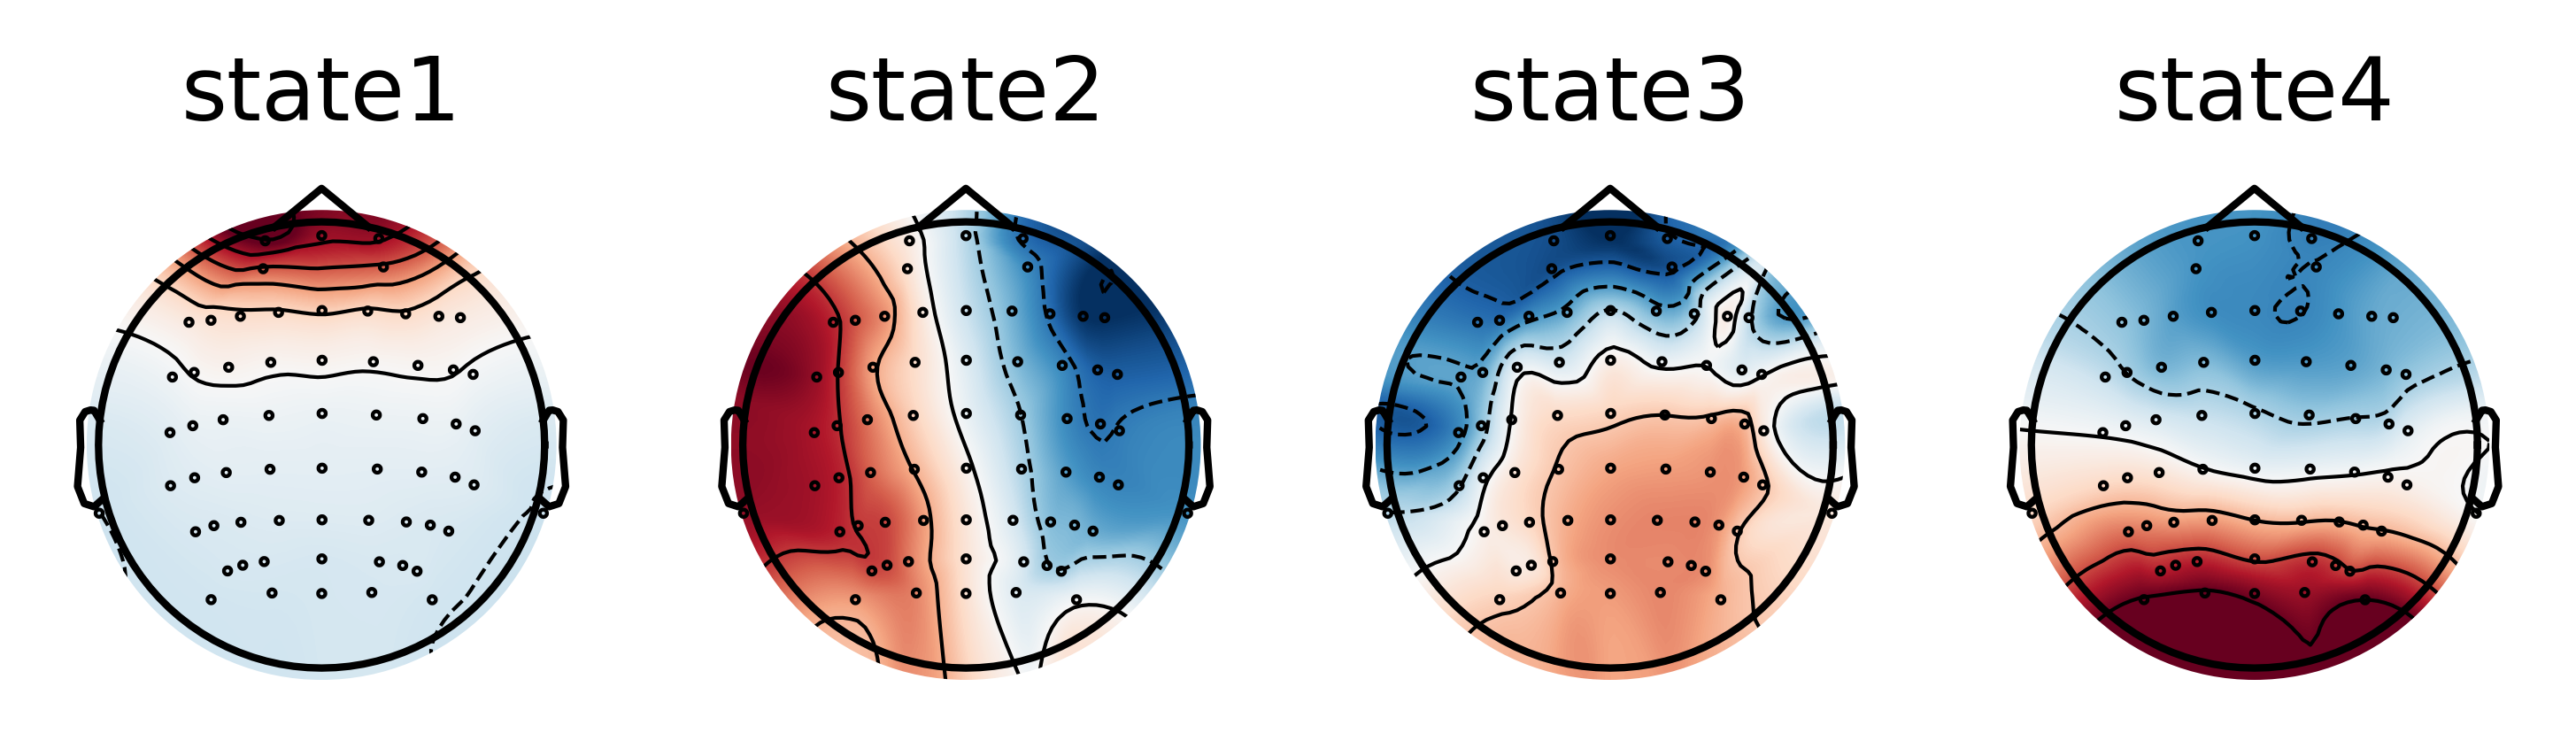

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

<Figure size 3600x2400 with 0 Axes>

In [5]:
vars_4F = display_maps(epoch_4F, n_maps=4, save=True, dpi=600, filename='40Hz_flicker', 
fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
calc_lzc=True, epochs=epochs_4F,save_log=True)

In [6]:
# """ display_maps(epoch_RF, n_maps=4, save=True, dpi=400, filename='Random_flicker', 
# fmt='.png', to_save_cache=to_save_cache, time_augs=time_augs, tm=tm, result_dir=result_dir,
# calc_lzc=True, epochs=epochs_RF,save_log=False) """

In [7]:
# bar_color = []
# for i in vars_4F[1]:
#     if i == 0:
#         bar_color.append('magenta')
#     elif i == 1:
#         bar_color.append('cyan')
#     elif i == 2:
#         bar_color.append('yellow')
#     elif i == 3:
#         bar_color.append('gray')
# plt.bar(range(10000), abs(vars_4F[5][10000:20000]), color=bar_color[10000:20000]) # or `color=['r', 'g', 'b']`
# plt.show()

In [8]:
# bar_color = []
# for i in vars_4R[1]:
#     if i == 0:
#         bar_color.append('magenta')
#     elif i == 1:
#         bar_color.append('cyan')
#     elif i == 2:
#         bar_color.append('yellow')
#     elif i == 3:
#         bar_color.append('gray')
# plt.bar(range(10000), abs(vars_4R[5][10000:20000]), color=bar_color[10000:20000]) # or `color=['r', 'g', 'b']`
# plt.show()

In [9]:
# dur_4F = [[],[],[],[]]
# prev_stat = vars_4F[1][0]
# u = 0
# for i,x in enumerate(vars_4F[1][1:]):
#     if not x == prev_stat:
#         dur_4F[prev_stat].append(i-u)
#         u = i
#         prev_stat = x
# dur_4F_pd = pd.DataFrame(dur_4F)
# dur_4F_pd.to_csv('4F_dur.csv')
# avg_dur_4F=[]
# std_dur_4F=[]
# avg_dur_4F.append(np.mean(dur_4F[0]))
# avg_dur_4F.append(np.mean(dur_4F[1]))
# avg_dur_4F.append(np.mean(dur_4F[2]))
# avg_dur_4F.append(np.mean(dur_4F[3]))
# std_dur_4F.append(np.std(dur_4F[0]))
# std_dur_4F.append(np.std(dur_4F[1]))
# std_dur_4F.append(np.std(dur_4F[2]))
# std_dur_4F.append(np.std(dur_4F[3]))

# dur_4R = [[],[],[],[]]
# prev_stat = vars_4R[1][0]
# u = 0
# for i,x in enumerate(vars_4R[1][1:]):
#     if not x == prev_stat:
#         dur_4R[prev_stat].append(i-u)
#         u = i
#         prev_stat = x
# dur_4R_pd = pd.DataFrame(dur_4R)
# dur_4R_pd.to_csv('4R_dur.csv')
# avg_dur_4R=[]
# std_dur_4R=[]
# avg_dur_4R.append(np.mean(dur_4R[0]))
# avg_dur_4R.append(np.mean(dur_4R[1]))
# avg_dur_4R.append(np.mean(dur_4R[2]))
# avg_dur_4R.append(np.mean(dur_4R[3]))
# std_dur_4R.append(np.std(dur_4R[0]))
# std_dur_4R.append(np.std(dur_4R[1]))
# std_dur_4R.append(np.std(dur_4R[2]))
# std_dur_4R.append(np.std(dur_4R[3]))
# print("4Favg:", avg_dur_4F)
# print("4Fstd:", std_dur_4F)
# print("4Ravg:", avg_dur_4R)
# print("4Rstd:", std_dur_4R)

In [10]:
def extractDuration(vars):
    dur_4F = [[],[],[],[]]
    prev_stat = vars[0]
    u = 0
    for i,x in enumerate(vars):
        if x != prev_stat:
            dur_4F[prev_stat].append(i-u)
            u = i
            prev_stat = x
    dur_4F_pd = pd.DataFrame(dur_4F)
    dur_4F_pd.to_csv('4F_dur.csv')
    avg_dur_4F=[]
    std_dur_4F=[]
    avg_dur_4F.append(np.mean(dur_4F[0]))
    avg_dur_4F.append(np.mean(dur_4F[1]))
    avg_dur_4F.append(np.mean(dur_4F[2]))
    avg_dur_4F.append(np.mean(dur_4F[3]))
    std_dur_4F.append(np.std(dur_4F[0]))
    std_dur_4F.append(np.std(dur_4F[1]))
    std_dur_4F.append(np.std(dur_4F[2]))
    std_dur_4F.append(np.std(dur_4F[3]))
    return avg_dur_4F, std_dur_4F

In [11]:
u,v = 0,0
stats_4F = []
for i,data in enumerate(epoch_4F.get_data()):
    len_dat = data.shape[1]
    v += len_dat
    avg_dur,std_dur = extractDuration(vars_4F[1][u:v])
    u = v
    stats_4F.append(avg_dur)
u,v = 0,0
stats_4R = []
for i,data in enumerate(epoch_4R.get_data()):
    len_dat = data.shape[1]
    v += len_dat
    avg_dur,std_dur = extractDuration(vars_4R[1][u:v])
    u = v
    stats_4R.append(avg_dur)

In [12]:
stats_pd = pd.DataFrame([stats_4F,stats_4R])
stats_pd.to_csv('Duration_FR.csv')

In [26]:
# For coverage

def count_map(cov_all=[], target=0):
    counted = list(cov_all).count(target)
    ratio = counted/len(cov_all)
    return ratio

covs_0, covs_1, covs_2, covs_3 = [],[],[],[]
u,v = 0,0
for i,data in enumerate(epoch_4R.get_data()):
    len_dat = data.shape[1]
    v += len_dat
    covs = vars_4R[1][u:v]
    zero = count_map(covs, 0)
    covs_0.append(zero)
    one = count_map(covs, 1)
    covs_1.append(one)
    two = count_map(covs, 2)
    covs_2.append(two)
    three = count_map(covs, 3)
    covs_3.append(three)
    u = v
data = {0:covs_0, 1:covs_1, 2:covs_2, 3:covs_3}
conv_4F = pd.DataFrame(data)
conv_4F.to_csv('coverage_4R.csv')

covs_0, covs_1, covs_2, covs_3 = [],[],[],[]
u,v = 0,0
for i,data in enumerate(epoch_4F.get_data()):
    len_dat = data.shape[1]
    v += len_dat
    covs = vars_4F[1][u:v]
    zero = count_map(covs, 0)
    covs_0.append(zero)
    one = count_map(covs, 1)
    covs_1.append(one)
    two = count_map(covs, 2)
    covs_2.append(two)
    three = count_map(covs, 3)
    covs_3.append(three)
    u = v
data = {0:covs_0, 1:covs_1, 2:covs_2, 3:covs_3}
conv_4F = pd.DataFrame(data)
conv_4F.to_csv('coverage_4F.csv')



In [ ]:
""" df = pd.DataFrame(columns=(1,2,3,4))
a = pd.DataFrame([1,2,3,4],columns=(1,2,3,4))
df = df.append(a, ignore_index=True)
b = pd.DataFrame([5,6,7,8],columns=(1,2,3,4))
df = df.append(b, ignore_index=True)
print(df) """

ValueError: Shape of passed values is (4, 1), indices imply (4, 4)

In [ ]:
#4R: 1,2,4,3
#4F: 4,1,2,3
""" from scipy.stats import *
t_A = ttest_ind(dur_4R[1],dur_4F[4])
t_B = ttest_ind(dur_4R[2],dur_4F[1])
t_C = ttest_ind(dur_4R[4],dur_4F[2])
t_D = ttest_ind(dur_4R[3],dur_4F[3]) """

In [ ]:
# tmin = 0.
# tmax = 160.
# fmin = 1.
# fmax = 90.
# sfreq = epoch_4F.info['sfreq']
# psds, freqs = mne.time_frequency.psd_welch(
#     epoch_4F,
#     n_fft=int(sfreq * (tmax - tmin)),
#     n_overlap=0, n_per_seg=int(sfreq * (tmax - tmin)),
#     tmin=tmin, tmax=tmax,
#     fmin=fmin, fmax=fmax,
#     window='boxcar',
#     verbose=False)
# def snr_spectrum(psd, noise_n_neighbor_freqs=1, noise_skip_neighbor_freqs=1):
#     """Compute SNR spectrum from PSD spectrum using convolution.

#     Parameters
#     ----------
#     psd : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
#         Data object containing PSD values. Works with arrays as produced by
#         MNE's PSD functions or channel/trial subsets.
#     noise_n_neighbor_freqs : int
#         Number of neighboring frequencies used to compute noise level.
#         increment by one to add one frequency bin ON BOTH SIDES
#     noise_skip_neighbor_freqs : int
#         set this >=1 if you want to exclude the immediately neighboring
#         frequency bins in noise level calculation

#     Returns
#     -------
#     snr : ndarray, shape ([n_trials, n_channels,] n_frequency_bins)
#         Array containing SNR for all epochs, channels, frequency bins.
#         NaN for frequencies on the edges, that do not have enough neighbors on
#         one side to calculate SNR.
#     """
#     # Construct a kernel that calculates the mean of the neighboring
#     # frequencies
#     averaging_kernel = np.concatenate((
#         np.ones(noise_n_neighbor_freqs),
#         np.zeros(2 * noise_skip_neighbor_freqs + 1),
#         np.ones(noise_n_neighbor_freqs)))
#     averaging_kernel /= averaging_kernel.sum()

#     # Calculate the mean of the neighboring frequencies by convolving with the
#     # averaging kernel.
#     mean_noise = np.apply_along_axis(
#         lambda psd_: np.convolve(psd_, averaging_kernel, mode='valid'),
#         axis=-1, arr=psd
#     )

#     # The mean is not defined on the edges so we will pad it with nas. The
#     # padding needs to be done for the last dimension only so we set it to
#     # (0, 0) for the other ones.
#     edge_width = noise_n_neighbor_freqs + noise_skip_neighbor_freqs
#     pad_width = [(0, 0)] * (mean_noise.ndim - 1) + [(edge_width, edge_width)]
#     mean_noise = np.pad(
#         mean_noise, pad_width=pad_width, constant_values=np.nan
#     )

#     return psd / mean_noise
# snrs = snr_spectrum(psds, noise_n_neighbor_freqs=3,
#                     noise_skip_neighbor_freqs=1)
# fig, axes = plt.subplots(2, 1, sharex='all', sharey='none', figsize=(8, 5))
# freq_range = range(np.where(np.floor(freqs) == 1.)[0][0],
#                    np.where(np.ceil(freqs) == fmax - 1)[0][0])

# psds_plot = 10 * np.log10(psds)
# psds_mean = psds_plot.mean(axis=(0, 1))[freq_range]
# psds_std = psds_plot.std(axis=(0, 1))[freq_range]
# axes[0].plot(freqs[freq_range], psds_mean, color='b')
# axes[0].fill_between(
#     freqs[freq_range], psds_mean - psds_std, psds_mean + psds_std,
#     color='b', alpha=.2)
# axes[0].set(title="PSD spectrum", ylabel='Power Spectral Density [dB]')

# # SNR spectrum
# snr_mean = snrs.mean(axis=(0, 1))[freq_range]
# snr_std = snrs.std(axis=(0, 1))[freq_range]

# axes[1].plot(freqs[freq_range], snr_mean, color='r')
# axes[1].fill_between(
#     freqs[freq_range], snr_mean - snr_std, snr_mean + snr_std,
#     color='r', alpha=.2)
# axes[1].set(
#     title="SNR spectrum", xlabel='Frequency [Hz]',
#     ylabel='SNR', ylim=[-2, 30], xlim=[fmin, fmax])
# fig.show()